In [1]:
import pandas as pd
import json
import numpy as np

import joblib

In [2]:
pd.set_option('display.max_colwidth',  None)

with open('result.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)

df.fillna(0, inplace=True)
df = df.apply(lambda series: pd.to_numeric(series, errors='coerce'))
df = df.dropna()

In [26]:
X = df.iloc[:, -3:]
y = df.iloc[:, -4]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ss = StandardScaler().fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [28]:
import tensorflow as tf 
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(X_train.shape[1], activation='relu'),
    keras.layers.Dense(X_train.shape[1]*2, activation='relu'),
    keras.layers.Dense(X_train.shape[1]*4, activation='relu'),
    # keras.layers.Dropout(0.1),
    keras.layers.Dense(X_train.shape[1]*8, activation='relu'),
    # keras.layers.Dropout(0.1),
    keras.layers.Dense(X_train.shape[1]*4, activation='relu'),
    # keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='linear') 
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=20)

Epoch 1/500


c:\Users\tothb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


12/12 [==============================] - 1s 19ms/step - loss: 3642.5386 - accuracy: 0.0130 - val_loss: 5527.1479 - val_accuracy: 0.0000e+00
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 3629.4355 - accuracy: 0.0130 - val_loss: 5508.6836 - val_accuracy: 0.0000e+00
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 3608.6108 - accuracy: 0.0130 - val_loss: 5479.6338 - val_accuracy: 0.0000e+00
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 3577.0767 - accuracy: 0.0000e+00 - val_loss: 5434.9741 - val_accuracy: 0.0000e+00
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 3529.5972 - accuracy: 0.0000e+00 - val_loss: 5367.7764 - val_accuracy: 0.0000e+00
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 3454.0818 - accuracy: 0.0000e+00 - val_loss: 5263.4263 - val_accuracy: 0.0000e+00
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 3341.6746 - accuracy

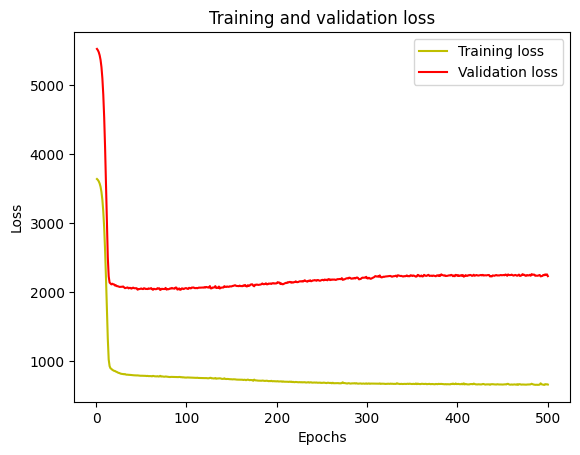

In [29]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyError: 'mean_absolute_error'

In [30]:
from sklearn import metrics

nn_pred = model.predict(ss.transform(X_test))


nn_MSE = metrics.mean_squared_error(ss.transform(y_test), nn_pred)
nn_MAE = metrics.mean_absolute_error(ss.transform(y_test), nn_pred)
nn_MAPE = metrics.mean_absolute_percentage_error(ss.transform(y_test), nn_pred)
nn_accuracy = 100-(nn_MAPE*100)

print('MSE', nn_MSE )
print('MAE', nn_MAE)
print('MAPE', nn_MAPE)
print('Accuracy', nn_accuracy)

3/3 [==============================] - 0s 1ms/step


c:\Users\tothb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\tothb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 41.00570879  24.4         30.99300537  66.39332054  24.4
  43.53288116  43.53288116  59.31259856  53.5889705   66.90097079
  51.01197126  30.99300537  51.65354643  30.99300537  33.88111086
  37.40287136  51.65354643  39.53081115  70.09526879  37.99644797
  45.14629948  41.22811101  43.53288116  58.25085525  61.42361668
  51.65354643  40.58802504  43.53288116  34.19817471  60.13418784
  66.42402729  40.44198895  57.84753363  60.13418784  43.07628635
  48.509212    30.99300537 200.18484288  77.23781568  43.53288116
  51.65354643  64.2209671   82.94265232  77.23781568  55.30910453
  69.0981506   39.53081115  43.53288116  31.22866894  24.4
  51.01197126  44.67965124  68.22672895  37.40287136  43.53288116
  57.00907579  56.497032    35.81213307  57.84066917  57.84753363
  58.43266214  42.50987798  43.53288116  57.84753363  52.89801543
  57.84753363  43.07628635  63.34050237  77.19675157  43.53288116
  55.20814912  82.17726312  55.91698621].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
print(model.predict([[42, 20, 4]]))

1/1 [==============================] - 0s 52ms/step
[[10.608651]]
